![Imgur](https://i.imgur.com/y5Xs8h2.png)

## Install necessary libraries and import them

In [1]:
import sys

In [2]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

## Working with signals

WARNING: Please ensure if you are using head phones **set your volume to a lower level.** You can always turn it up if you need to but always ensure to protect your ears!! 

Before we start playing with signals, it's important to take a look at the **unit circle**. 

The unit circle is key to understanding and feeling comfortable with the creation and manipulation of signals. In the unit circle, real as well as imaginary numbers can be explored (relevant for the Fourier Transform), and signals can go infinitely long: going around and around. 

For fabulous visuals and insights, check out this <a href='https://www.youtube.com/watch?v=spUNpyF58BY&t=848s'>video</a> by 3 Blue 1 Brown.

**Hint for the completion of the first challenge in this tutorial:** be aware of pi and its role in the unit circle.
* pi/2 corresponds to 90 degrees, or a quarter of a circle 
    * If the whole circle represents one second, this would be a quarter of a second
* pi corresponds to 180 degrees or half of the circle 
    * or half a second. You get the gist.
* 3pi/2 corresponds to 270 degrees or three-quarters of a circle
* 2pi corresponds to 360 degrees or a full circle.

We will come back to this unit circle in a moment; for now just familiarize yourself with it if you aren't already. 

### Unit Circle

![Imgur](https://i.imgur.com/qWW9EKY.png)

https://commons.wikimedia.org/wiki/File:Unit_circle_angles.svg

Gustavb (talk · contribs) [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0/)]

### Sampling Rate

Digital signals are composed of a series of measurements called samples. The sound pressure in the air is measured in time, and the number of measurements per seconds corresponds to a signal's sampling rate. 

This means that if a signal has a sampling rate of 8000, a total of 8,000 samples are recorded every second. At the end of this tutorial, you will have the opportunity to explore the relationship of frequencies within a signal and the sampling rate of that signal. The Nyquist theorem says that the sampling rate should be at least twice as high as the highest frequency (later we'll visualize signals post Fourier Transform, which should help you to understand why). Therefore, if we use a sampling rate of 8000, we should know that no frequencies higher than 4000 exist in our signal.

### Let's build a function!

I have defined the function `create_signal` below. Many examples of creating a signal online can be a bit abstract, so my aim here is to add some context, how the unit circle plays a role in sin wave signal creation.

With the unit circle in mind, why do you think I defined the variable `full_cirlce` as '2 * np.pi'? 

In [3]:
def create_signal(freq=200, amplitude=0.4, sampling_rate=8000, dur_sec=0.25):
    #The variable `time` holds the expected number of measurements taken: 
    #duration in seconds multiplied by the sampling rate. 
    time = np.linspace(0, dur_sec, np.floor(dur_sec*sampling_rate))
    full_circle = 2 * np.pi
    sinewave_samples = amplitude * np.sin((freq*full_circle)*time)
    return sinewave_samples, sampling_rate, time

Text(0, 0.5, 'amplitude')

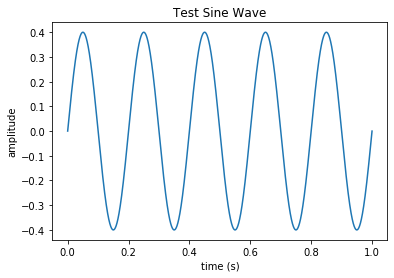

In [4]:
#Create a sine signal that repeats itself 5 times each second:
your_signal, sampling_rate, time = create_signal(freq=5,amplitude=0.4,sampling_rate=8000,dur_sec=1)
plt.plot(time, your_signal)
plt.title('Test Sine Wave')
plt.xlabel('time (s)')
plt.ylabel('amplitude')

## Let's play with signals!

In [5]:
freq = 500
sig, sr, t = create_signal(freq=freq,amplitude=0.4,dur_sec=1.)

#### What does a signal with 500 Hz frequency sound like?

In [6]:
ipd.Audio(sig, rate=sr)

#### Let's add some noise:

In [7]:
def create_noise(num_samples, amplitude=0.025, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)
    noise = amplitude * np.random.randn(num_samples)
    return noise

In [8]:
noise = create_noise(len(sig), amplitude=0.05)
noisey_sig = sig + noise

In [9]:
ipd.Audio(noisey_sig, rate=sr)

### What do these signals look like?

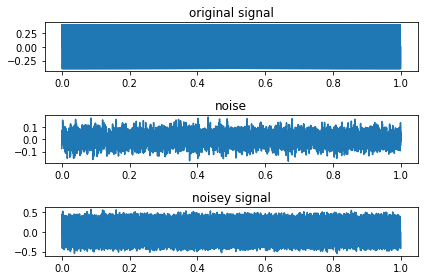

In [10]:
plt.subplot(311)
plt.plot(t,sig)
plt.title('original signal')
plt.subplot(312)
plt.plot(t,noise)
plt.title('noise')
plt.subplot(313)
plt.plot(t,noisey_sig)
plt.title('noisey signal')
plt.tight_layout()

#### Let's zoom in...

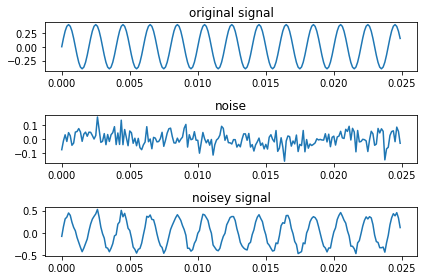

In [11]:
num_samples = 200
plt.subplot(311)
plt.plot(t[:num_samples],sig[:num_samples])
plt.title('original signal')
plt.subplot(312)
plt.plot(t[:num_samples],noise[:num_samples])
plt.title('noise')
plt.subplot(313)
plt.plot(t[:num_samples],noisey_sig[:num_samples])
plt.title('noisey signal')
plt.tight_layout()

### What happens when a signal has more than one frequency?

In [12]:
freq1 = 300
freq2 = 700
sig1, sr, t = create_signal(freq=freq1,dur_sec=1)
sig2, sr, t = create_signal(freq=freq2,dur_sec=1)
sig3 = sig1+sig2

#### Tone with (originally) frequency 300 Hz

In [13]:
ipd.Audio(sig1, rate=sr)

#### Tone with (originally) frequency 700 Hz

In [14]:
ipd.Audio(sig2, rate=sr)

#### Tone with both frequencies 300 and 700 Hz

In [15]:
ipd.Audio(sig3, rate=sr)

### And visually:

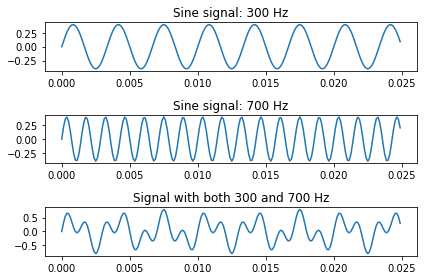

In [16]:
num_samps = 200
plt.subplot(311)
plt.plot(t[:num_samps],sig1[:num_samps])
plt.title('Sine signal: {} Hz'.format(freq1))
plt.subplot(312)
plt.plot(t[:num_samps],sig2[:num_samps])
plt.title('Sine signal: {} Hz'.format(freq2))
plt.subplot(313)
plt.plot(t[:num_samps],sig3[:num_samps])
plt.title('Signal with both {} and {} Hz'.format(freq1,freq2))
plt.tight_layout()

In [17]:
#Add some noise
noise4sig3 = create_noise(len(sig3), amplitude=0.2)
noisey_sig3 = sig3 + (noise4sig3)

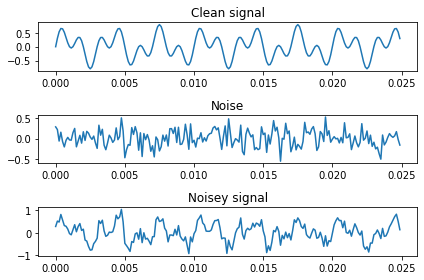

In [18]:
plt.subplot(3,1,1)
plt.plot(t[:num_samps],sig3[:num_samps])
plt.title('Clean signal')
plt.subplot(3,1,2)
plt.plot(t[:num_samps],noise4sig3[:num_samps])
plt.title('Noise')
plt.subplot(3,1,3)
plt.plot(t[:num_samps],noisey_sig3[:num_samps])
plt.title('Noisey signal')
plt.tight_layout()

In [19]:
ipd.Audio(noisey_sig3, rate=sr)

## Fourier Transform!

This last signal, with the two frequencies and noise, shows how messy the waveform gets when things get complicated. Just looking at that signal it is hard to tell which frequencies are in there.

The Fourier Transform allows us to take complicated waveforms and figure out which frequencies are in there. As the signal we've made doesn't change over time, we can apply the Fourier transform to the entire signal. (When dealing with fluctuating signals, like real-world noise and speech, windowing will need to be applied)

In [20]:
from numpy.fft import fft, ifft

In [21]:
freq1_fft = fft(noisey_sig)
freq2_fft = fft(noisey_sig3)

### Visualizing the FFT: real vs imaginary numbers

The Fourier Transform has both real and imaginary numbers. If we look at some of the values from the FFT, you can see the real number on the left side and the imaginary numbers on the right - they are divided by either a `+` or `-`sign. The numbers with the `j` represent the imaginary part (Python uses `j`, but `i` is also often used):

In [22]:
#look at the first 10 samples of the FFT values
freq1_fft[:10]

array([ 4.17504516+0.j        , -3.08862019+2.64624556j,
       -0.13443298-1.82822329j, -4.03073451+0.2435204j ,
        0.60816141+2.48160637j,  1.31078009-3.76913587j,
       -1.76916267+2.00551016j,  2.47737731-0.39846691j,
       -0.38833363+7.7797849j ,  2.01055314+1.88528789j])

### What do imaginary numbers look like?

We can graph **real** numbers going from left to right: left goes to negative infinity and right goes on to positive infinity. But how can we graph or visualize **imaginary** numbers? 

The unit circle! 

While the unit circle figure I first showed you doesn't use `j` or `i` to indicate the imaginary numbers, they are there and look like coordinates (which they are):
* The circle's center: (0, 0j)
* The right most part of the circle: (+1, 0j)
* The top most part: (0, +1j)
* The left most part: (-1, 0j)
* the bottom most part: (0, -1j)


![Imgur](https://i.imgur.com/z8n4xdC.png)

Credit: By Loadmaster (David R. Tribble)This image was made by Loadmaster (David R. Tribble)Email the author: David R. TribbleAlso see my personal gallery at Google Photos - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=9696627

Let's say we have a number with a real part 0.02 and imaginary part +0.89j, when we see it on the real number spectrum, we only see 0.02. 

That is the same thing that happens with the Fourier Transform. When we graph it in a 2D space, we only see the real parts of the values, which is what we want for identifying the existing frequencies. This is the beautiful trick of the Fourier Transform: it uses imaginary numbers and Euler's e to output values that have low real parts *except* if a frequency exists in the signal. If it exists, the real part becomes large and can be visualized in our graph below.

/Users/gherman/Downloads/sklearn/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


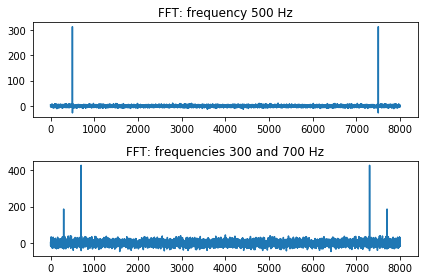

In [23]:
plt.subplot(2,1,1)
plt.plot(freq1_fft)
plt.title('FFT: frequency {} Hz'.format(freq))
plt.subplot(2,1,2)
plt.plot(freq2_fft)
plt.title('FFT: frequencies {} and {} Hz'.format(freq1,freq2))
plt.tight_layout()

### Converting the FFT 

By taking the absolute value of the FFT, we get the magnitude of the frequencies in the signal. 
By multiplying the magnitude values by 2 and dividing them by the length of the provided samples, we scale the magnitude to correspond to the amplitude of the original signal, i.e. amplitude of 0.4, rather than 300 or 400 as seen in the figure above above.

In [24]:
freq1_mag = np.abs(freq1_fft)*2/len(sig)
freq2_mag = np.abs(freq2_fft)*2/len(sig3)

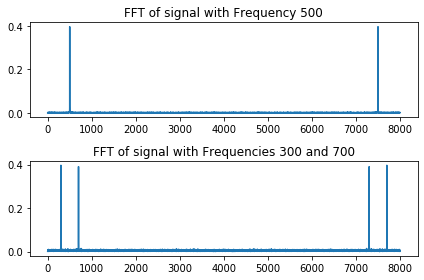

In [25]:
plt.subplot(211)
plt.plot(freq1_mag)
plt.title('FFT of signal with Frequency {}'.format(freq))
plt.subplot(212)
plt.plot(freq2_mag)
plt.title('FFT of signal with Frequencies {} and {}'.format(freq1,freq2))
plt.tight_layout()

### Hmmmmmm.. 
#### **Why are these graphs mirrored and what do the numbers on the x-axis refer to?**

The x-axis shows the number of fft bins used to calculate which frequencies exist in the signal. As default, Numpy uses the number of samples provided as the number of fft bins. We fed 1 second of sound data, sampled at 8000 samples per second. Therefore, 8000 fft bins are seen here. (Note: this is possible because the signal is stationary and does not change. In another notebook I will explore non-stationary signals, which require FFTs of smaller sections)

I'm sure you also notice that the graphs are mirrored. The Fourier Transform is symmetrical; therefore if we take just half of the fft, we have all the values we need. Remember the Nyquist Theorem? That the sampling rate should be at least twice as high as the highest frequency? 8000 is the sampling rate; if we remove half of the fft, only 4000 are left. 

This number, 4000 in this case, represents the frequencies explored in the signal. If a frequency exists in the signal, the magnitude of the real value in the fft is high.

In [26]:
nyquist = sr/2
hz = np.linspace(0,nyquist,np.floor(len(noisey_sig)/2)+1)

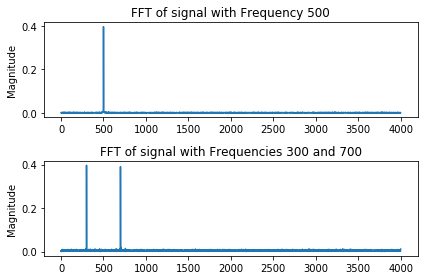

In [27]:
plt.subplot(211)
plt.plot(hz, freq1_mag[:len(hz)])
plt.title('FFT of signal with Frequency {}'.format(freq))
plt.ylabel('Magnitude')
plt.subplot(212)
plt.plot(hz, freq2_mag[:len(hz)])
plt.title('FFT of signal with Frequencies {} and {}'.format(freq1,freq2))
plt.ylabel('Magnitude')
plt.tight_layout()

### Problem to solve:

The Nyquist theorem indicates that the sampling rate of a signal should be at least twice as high as the highest frequency. Why do you think that is? 

What would happen if we generated a signal with a sampling rate of 8000 with a frequency 6000? 

Repeat the steps above and visualize what happens. Why do you think this is?

In [28]:
sig_prob, sampling_rate, time = create_signal(freq=6000,sampling_rate=8000,dur_sec=1)
sig_prob_noise = create_noise(len(sig_prob))

And continue on your own:
* take FFT
* convert it to magnitude
* use only half of the values
* graph it